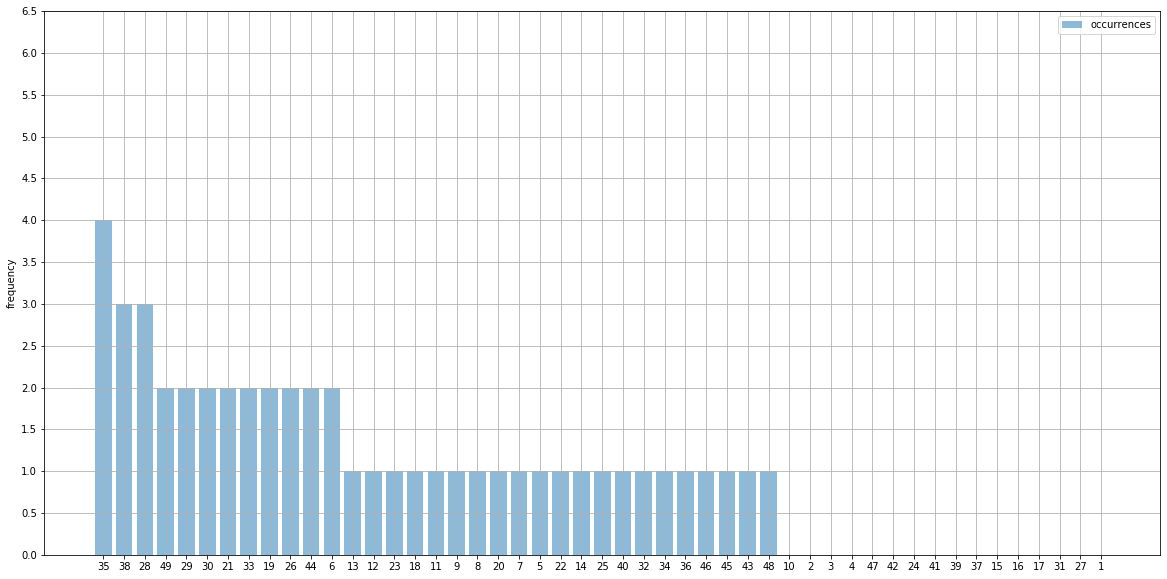

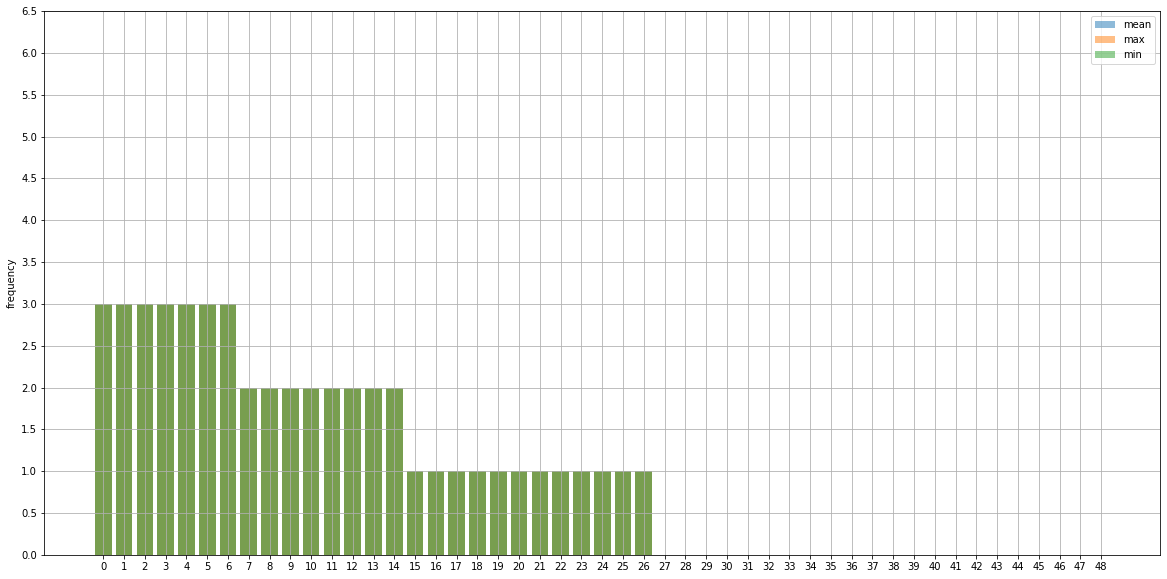

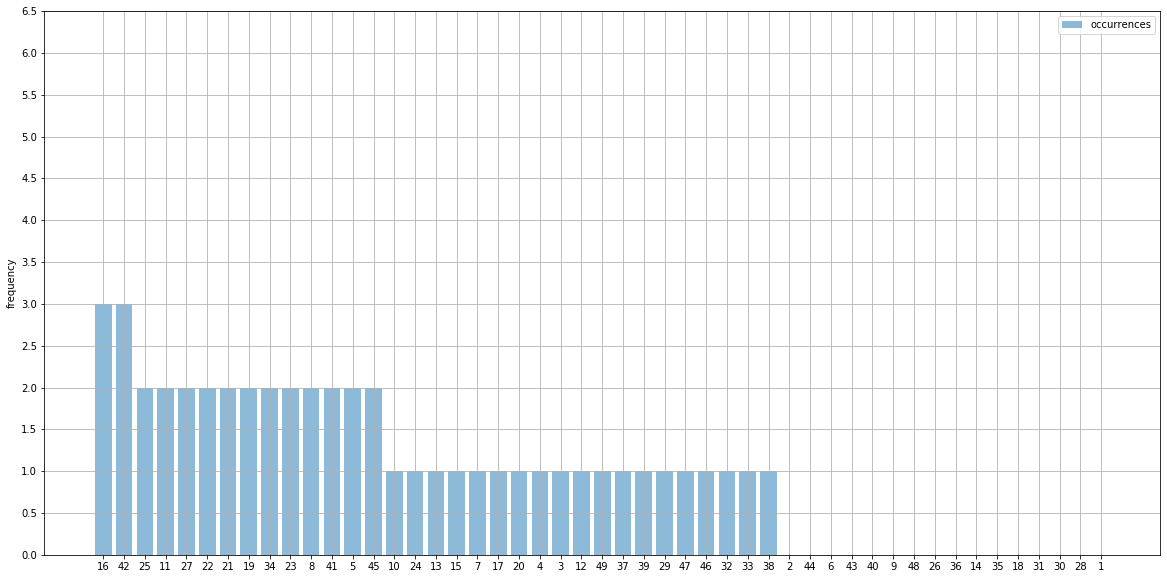

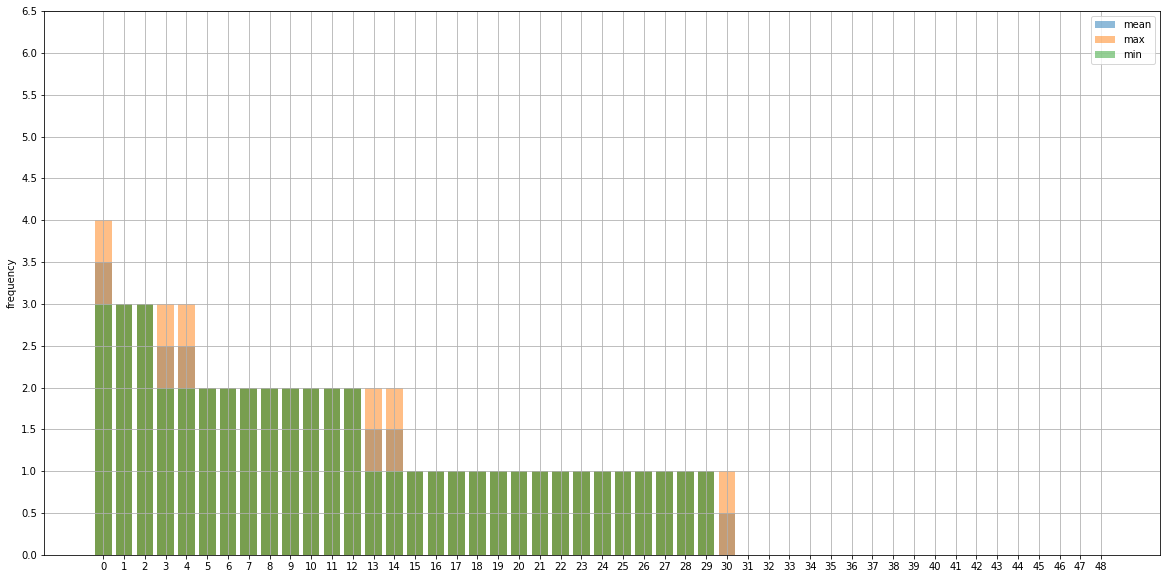

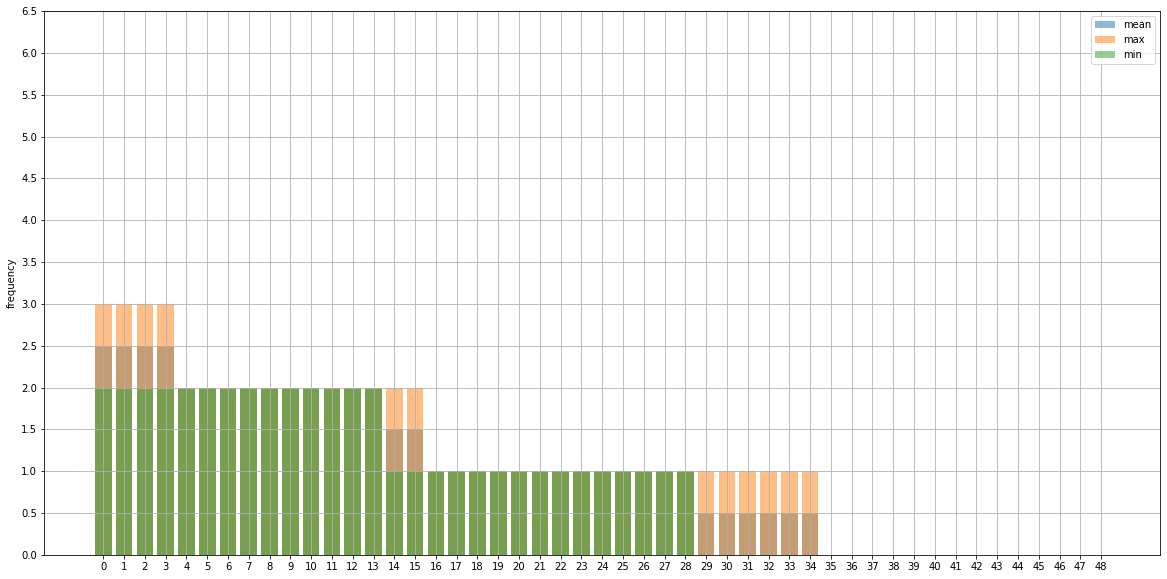

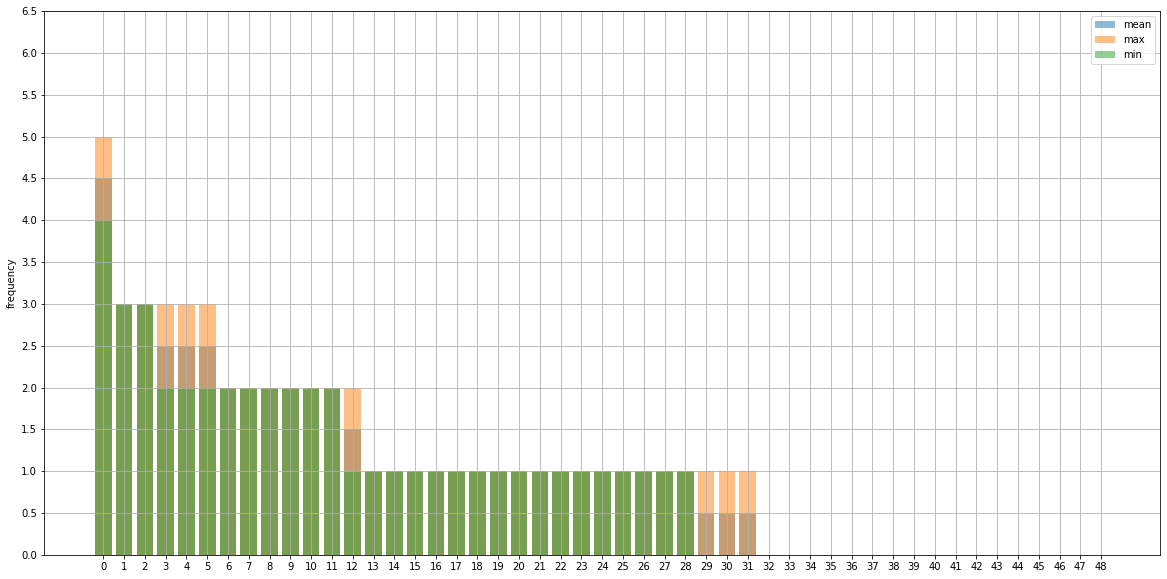

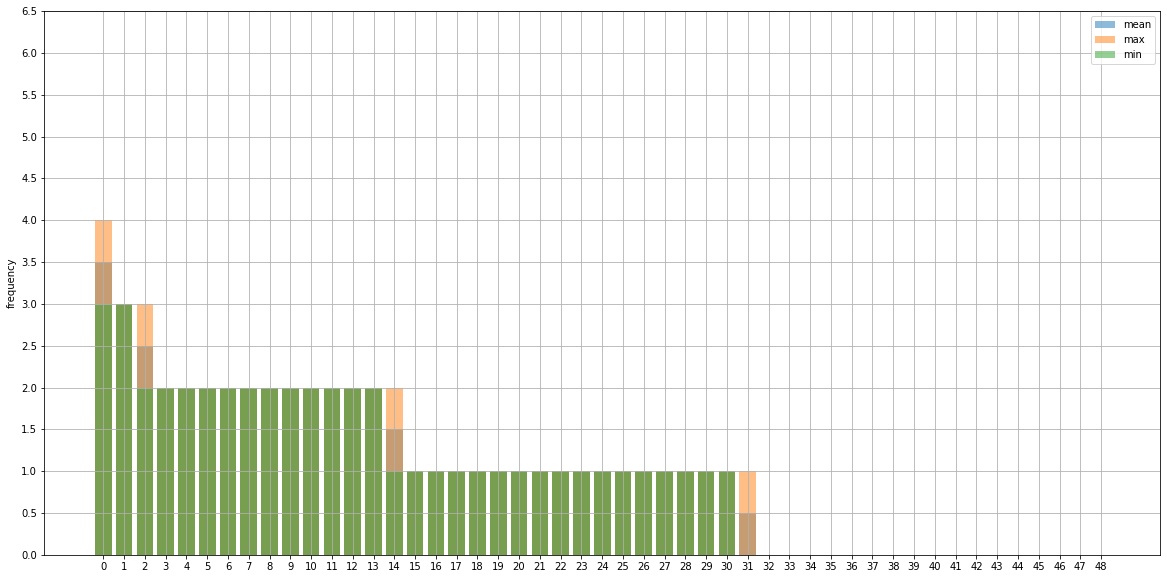

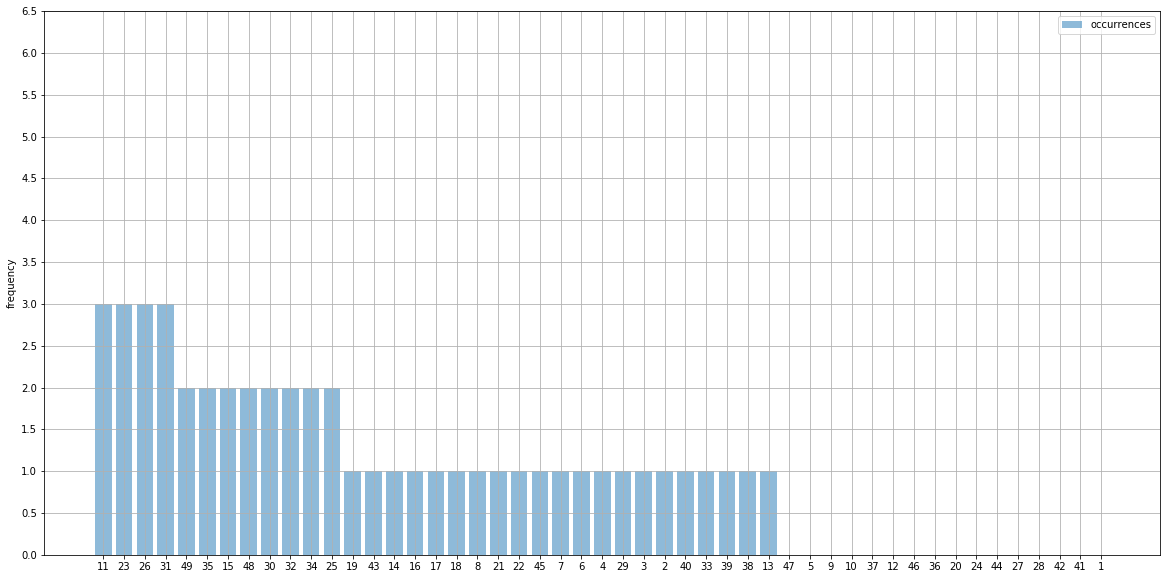

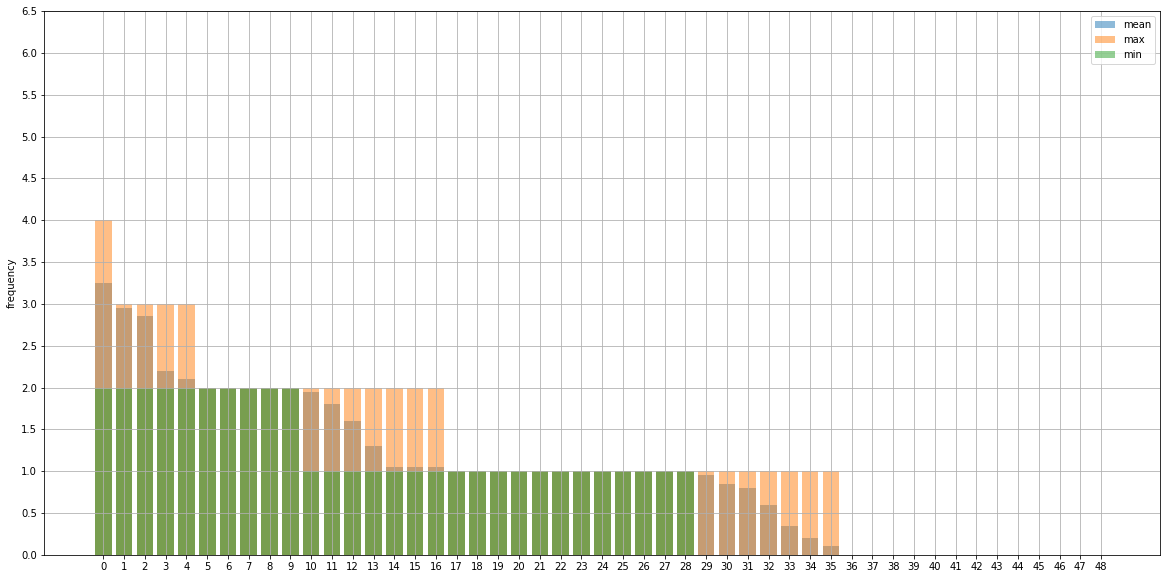

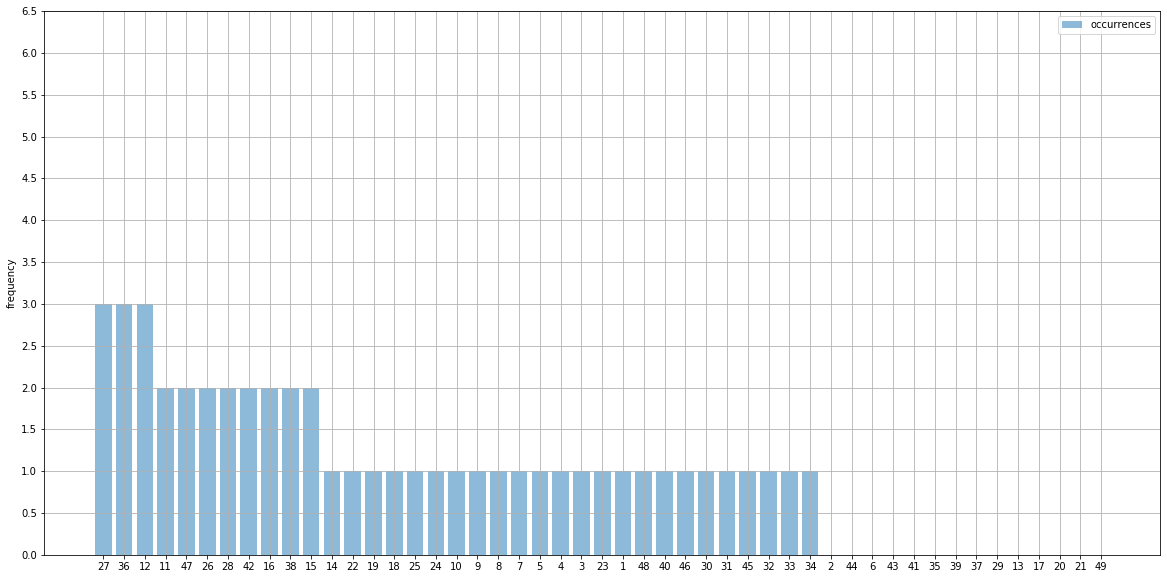

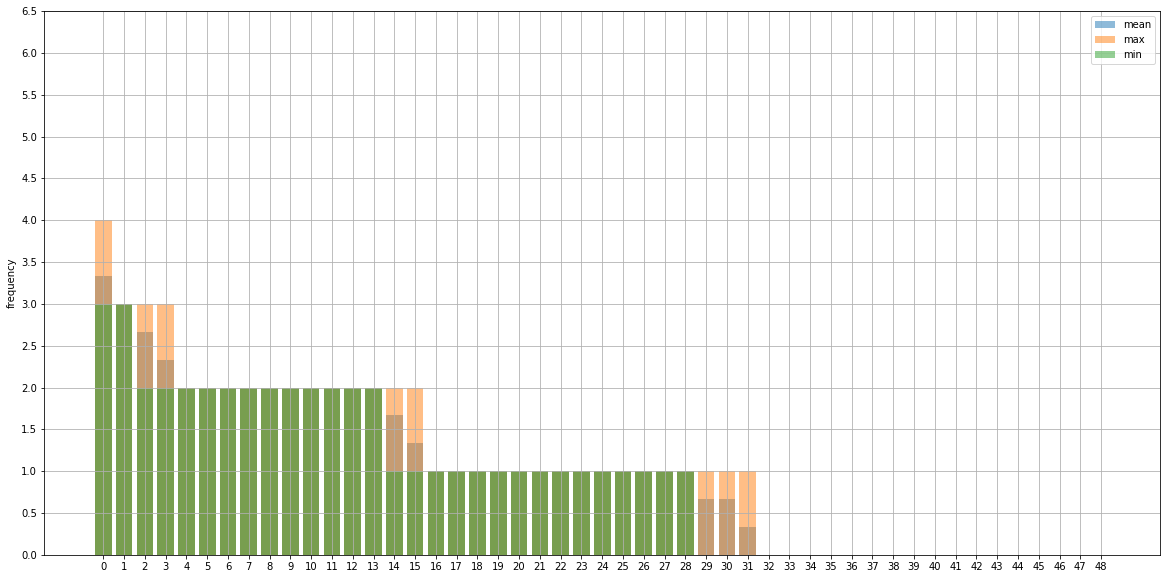

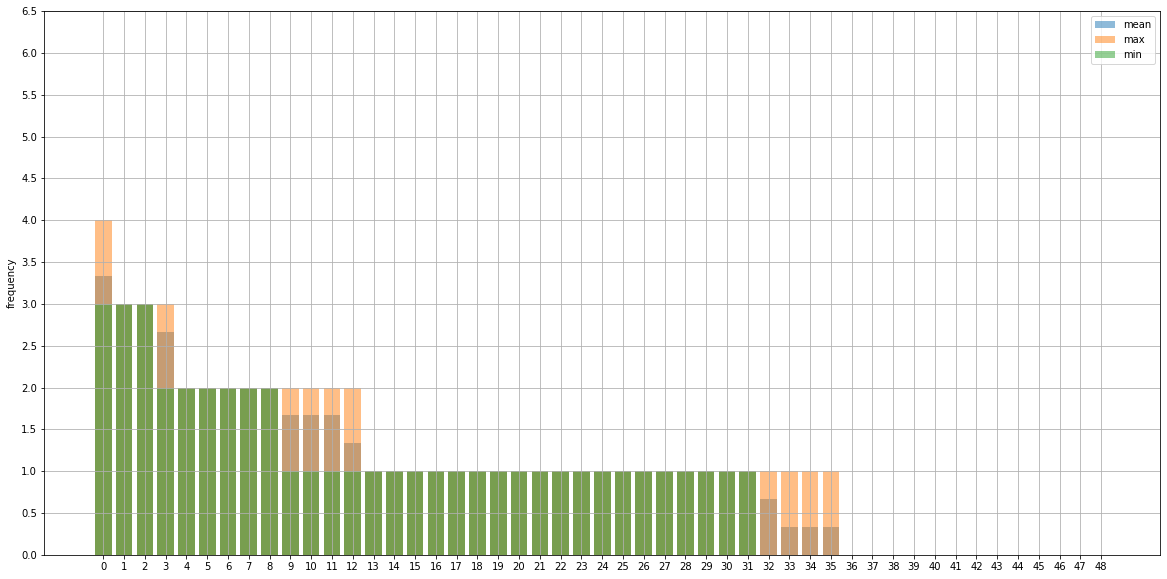

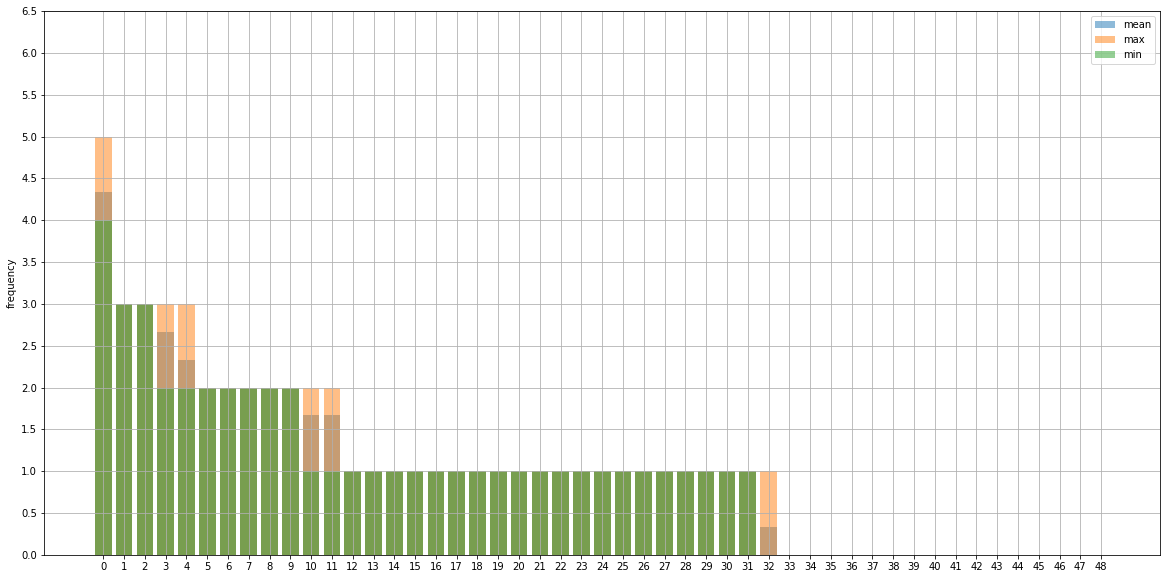

SystemExit: 0

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow
from Avatar import Ui_MainWindow


import sys
from PyQt5 import QtCore  #更新畫面
from PyQt5.QtWidgets import QApplication, QMainWindow, QLineEdit, QSizePolicy

from matplotlib.backends.qt_compat import QtCore, QtWidgets, is_pyqt5
if is_pyqt5():
    from matplotlib.backends.backend_qt5agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)
else:
    from matplotlib.backends.backend_qt4agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)
from matplotlib.figure import Figure



class MainWindow(QMainWindow, Ui_MainWindow):
    def __init__(self, parent=None):
        super(MainWindow, self).__init__(parent)
        self.setupUi(self)
        #============================================================================   
        
        layout = QtWidgets.QVBoxLayout(self.widget)
        dynamic_canvas = FigureCanvas(Figure(figsize=(5, 3)))
        layout.addWidget(dynamic_canvas)
        self._dynamic_ax = dynamic_canvas.figure.subplots()
        #============================================================================   
        
        
        
    def clear(self):
        self.lineEdit.setText("")
        self.lineEdit_2.setText("")
        self.lineEdit_3.setText("")
        self.lineEdit_4.setText("")
        self.label_9.setText("")
        self.label_10.setText("")
        self.label_11.setText("")
        self.label_12.setText("")
        self.textBrowser.setText("")
        
        QtCore.QCoreApplication.processEvents()  #更新畫面
        self._dynamic_ax.clear()
        self._dynamic_ax.figure.canvas.draw()
    
    def data_create(self, data_number=None, ball_number=None, select_number=None):
        '''Create lotto data
        in the form of numpy array'''
        import random
        import numpy as np 

        data = np.array([np.sort(random.sample(list(range(1, ball_number+1)), k=select_number))])
        for i in range(data_number-1):
            data = np.append(data, [np.sort(random.sample(list(range(1, ball_number+1)), k=select_number))], axis=0)    
        return data
    
    def sort_by_number_of_occurrences(self, data=None, ball_number=None):   
        '''Sort by number of occurrences'''
        import numpy as np     
        occurrences = np.array([])
        for i in range(1, ball_number+1):
            occurrences = np.append(occurrences, np.sum(data==i))
        occurrences = occurrences.astype(int)
        ball_id = np.argsort(occurrences)[::-1]+1
        occurrences = np.sort(occurrences)[::-1]
        return occurrences, ball_id
  
    
    
    def analysis_1(self):
        data_number = int(self.lineEdit.text())
        ball_number = int(self.lineEdit_2.text())
        select_number = int(self.lineEdit_3.text())
        number_of_samples = int(self.lineEdit_4.text())
        
        self.label_9.setText(self.lineEdit.text())
        self.label_10.setText(self.lineEdit_2.text())
        self.label_11.setText(self.lineEdit_3.text())
        self.label_12.setText(self.lineEdit_4.text())
        
        data = self.data_create(data_number=data_number, ball_number=ball_number, select_number=select_number)
        occurrences, ball_id = self.sort_by_number_of_occurrences(data=data, ball_number=ball_number)
        
        self.textBrowser.append(str(occurrences))
        self.textBrowser.append(str(ball_id))
#         self.textBrowser.insertPlainText(str(occurrences))
#         self.textBrowser.insertPlainText(str(ball_id))
        import numpy as np 
        ind = np.arange(1, len(occurrences)+1)
        QtCore.QCoreApplication.processEvents()  #更新畫面
            
        self._dynamic_ax.clear()
        self._dynamic_ax.set_title("Analysis 1")
        self._dynamic_ax.set_xlabel("id")
        self._dynamic_ax.set_ylabel("frequency")
        self._dynamic_ax.bar(ball_id, occurrences, label='occurrences', alpha=0.5)
        self._dynamic_ax.legend()
        self._dynamic_ax.grid()
#             self._dynamic_ax.xticks(np.arange(0, 49, step=1))
#             self._dynamic_ax.yticks(np.arange(0, data_number, step=0.5))
        self._dynamic_ax.figure.canvas.draw()
    
        
#         %matplotlib inline
#         import matplotlib.pyplot as plt

#         ind = np.arange(1, len(occurrences)+1)
#         plt.figure(figsize=(20,10))
#         plt.bar(ind, occurrences, label='occurrences', alpha=0.5)

#         plt.legend()
#         plt.ylabel('frequency')
#         plt.xticks(ind, ball_id)
#         plt.yticks(np.arange(0, 7, step=0.5))
#         plt.grid()
#         plt.show()
        
    def analysis_2(self):
        data_number = int(self.lineEdit.text())
        ball_number = int(self.lineEdit_2.text())
        select_number = int(self.lineEdit_3.text())
        number_of_samples = int(self.lineEdit_4.text())
        
        self.label_9.setText(self.lineEdit.text())
        self.label_10.setText(self.lineEdit_2.text())
        self.label_11.setText(self.lineEdit_3.text())
        self.label_12.setText(self.lineEdit_4.text())
        
        import numpy as np

        occurrences, ball_id = self.sort_by_number_of_occurrences(data=self.data_create(data_number=data_number, ball_number=ball_number, select_number=select_number), ball_number=ball_number)
        sort_data = np.expand_dims(occurrences, axis=0)
        ind = np.arange(len(sort_data[0]))
        
        QtCore.QCoreApplication.processEvents()  #更新畫面

        self._dynamic_ax.clear()
        self._dynamic_ax.set_title("Analysis 2")
        self._dynamic_ax.set_xlabel("id")
        self._dynamic_ax.set_ylabel("frequency")
        self._dynamic_ax.bar(ind, np.mean(sort_data, axis=0), label='mean', alpha=0.5)
        self._dynamic_ax.bar(ind, np.max(sort_data, axis=0), label='max', alpha=0.5)
        self._dynamic_ax.bar(ind, np.min(sort_data, axis=0), label='min', alpha=0.5)
        self._dynamic_ax.legend()
        self._dynamic_ax.grid()
#             self._dynamic_ax.xticks(np.arange(0, 49, step=1))
#             self._dynamic_ax.yticks(np.arange(0, data_number, step=0.5))
        self._dynamic_ax.figure.canvas.draw()
        
        for i in range(number_of_samples-1):
            occurrences, ball_id = self.sort_by_number_of_occurrences(data=self.data_create(data_number=data_number, ball_number=ball_number, select_number=select_number), ball_number=ball_number)
            sort_data = np.append(sort_data, np.expand_dims(occurrences, axis=0), axis=0)

        #============================================================================       
            QtCore.QCoreApplication.processEvents()  #更新畫面
            
            self._dynamic_ax.clear()
            self._dynamic_ax.set_title("Analysis 2")
            self._dynamic_ax.set_xlabel("id")
            self._dynamic_ax.set_ylabel("frequency")
            self._dynamic_ax.bar(ind, np.mean(sort_data, axis=0), label='mean', alpha=0.5)
            self._dynamic_ax.bar(ind, np.max(sort_data, axis=0), label='max', alpha=0.5)
            self._dynamic_ax.bar(ind, np.min(sort_data, axis=0), label='min', alpha=0.5)
            self._dynamic_ax.legend()
            self._dynamic_ax.grid()
#             self._dynamic_ax.xticks(np.arange(0, 49, step=1))
#             self._dynamic_ax.yticks(np.arange(0, data_number, step=0.5))
            self._dynamic_ax.figure.canvas.draw()
            
        #============================================================================    
            
            
        self.textBrowser.append(str(np.mean(sort_data, axis=0)))
        self.textBrowser.append(str(np.max(sort_data, axis=0)))
        self.textBrowser.append(str(np.min(sort_data, axis=0)))
        
#         %matplotlib inline
#         import matplotlib.pyplot as plt

#         ind = np.arange(len(sort_data[0]))
#         plt.figure(figsize=(20,10))
#         plt.bar(ind, np.mean(sort_data, axis=0), label='mean', alpha=0.5)
#         plt.bar(ind, np.max(sort_data, axis=0), label='max', alpha=0.5)
#         plt.bar(ind, np.min(sort_data, axis=0), label='min', alpha=0.5)
#         plt.legend()
#         plt.ylabel('frequency')
#         plt.xticks(np.arange(0, 49, step=1))
#         plt.yticks(np.arange(0, data_number, step=0.5))
#         plt.grid()
#         plt.show() 
        
        

if __name__=="__main__":
    app = QApplication(sys.argv)
    win = MainWindow()
    win.show()
    sys.exit(app.exec_())